# Generate Caption for an Image VGG16

**Predict Caption**

In [26]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length, padding='post')
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text


# Display Image with Caption VGG16

**Generate Caption**

In [27]:

def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    
    img_path = os.path.join(BASE_DIR, "Images", image_name)  
    image = Image.open(img_path)
    
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    y_pred = y_pred.replace('startseq', '').replace('endseq', '').strip()
        
    print("Generated Caption: ", y_pred)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    tts = gTTS(y_pred, lang='en')
    audio_path = f"predicted_caption_{image_name.split('.')[0]}.mp3"
    tts.save(audio_path)

    print("Click to play audio:")
    display(Audio(audio_path))
    print("\n\n")


Generated Caption:  three children are playing in fountain


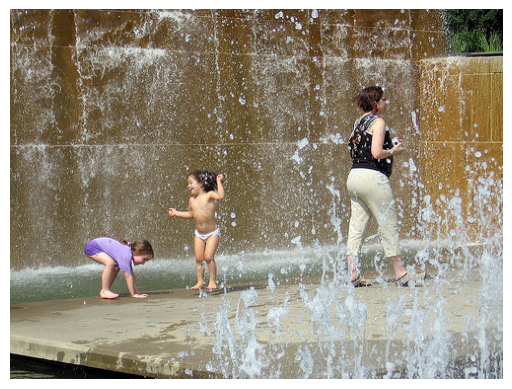

Click to play audio:





Generated Caption:  girl slides down slide


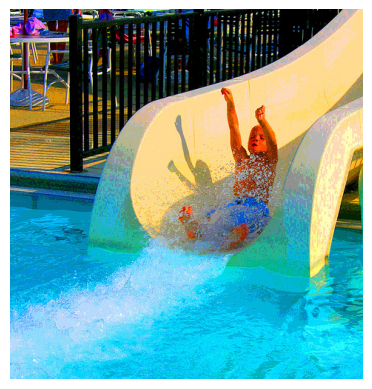

Click to play audio:





Generated Caption:  man is riding bike on dirt hill


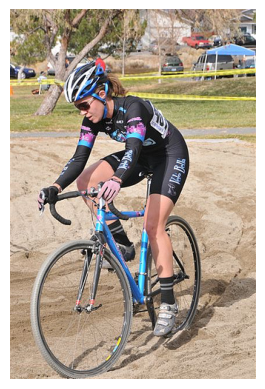

Click to play audio:


In [28]:

    images_path = os.listdir(os.path.join(BASE_DIR, "Images"))
    random_images = np.random.choice(images_path, 3, replace=False)
    
    for image_name in random_images:
        generate_caption(image_name)